https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners#%F0%9F%93%9A-NLP-(Natural-Language-Processing)-with-Python

### 0. 예제로 CountVectorizer 사용해 보기

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']
simple_test = ["please don't call me"]

vect= CountVectorizer()
vect.fit(simple_train)

simple_train_dtm= vect.transform(simple_train)
simple_test_dtm= vect.transform(simple_test)

print('<simple_train>')
display(pd.DataFrame(simple_train_dtm.toarray(), columns= vect.get_feature_names_out()))
print('<simple_test>')
display(pd.DataFrame(simple_test_dtm.toarray(), columns= vect.get_feature_names_out()))

<simple_train>


,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


<simple_test>


,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


### 1. 데이터 불러오기, 필요없는 열 삭제, 나머지를 적당한 이름으로 바꾸기

In [2]:
df= pd.read_csv('Dataset/spam.csv', encoding= 'latin-1')
df.dropna(how= 'any', axis= 1, inplace= True) # 결측치가 존재하는 열을 삭제한다.
df.columns= ['label', 'message']

### 2. EDA

In [3]:
df.groupby('label').describe()
# ham(4825)이 spam(747)보다 많다.

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

#### 1. ham:0, spam:1로 바꾼다.

In [4]:
df['label_num']= df.label.map({'ham':0, 'spam':1})

#### 2. message 단어 개수 지정 후 그래프로 빈도 확인

In [5]:
df['message_len']= df.message.apply(len)
# apply: 파라미터로 전달된 함수를 데이터프레임, 시리즈의 모든 값에 적용하여 결과를 반환한다.

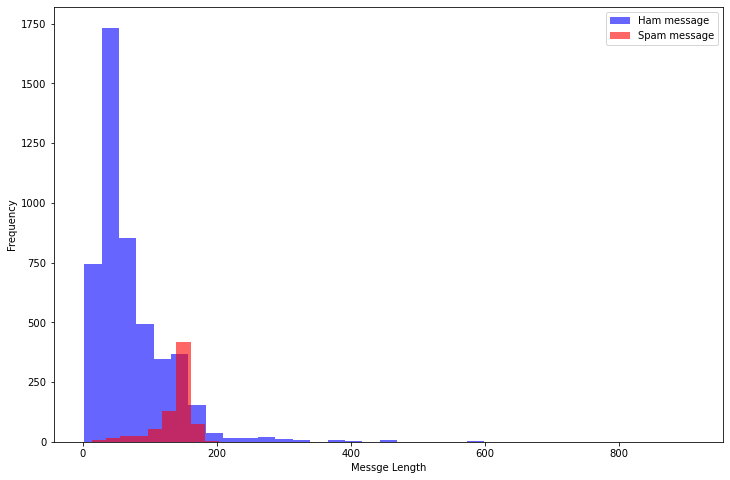

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize= (12,8))
df[df.label== 'ham'].message_len.plot(bins= 35, kind= 'hist', color= 'blue',label= 'Ham message', alpha= 0.6)
df[df.label== 'spam'].message_len.plot(kind= 'hist', color= 'red', label= 'Spam message', alpha= 0.6)

plt.legend()
plt.xlabel('Messge Length')
plt.show()
# spam의 글자수가 많은게 보인다.

In [7]:
df[df.label== 'ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


### 3. 텍스트 전처리

#### 1. 구두점(punctuation), 불용어(stopwords)를 제거한다.

In [8]:
# 구두점, 불용어 제거하는 함수 작성
import string
from nltk.corpus import stopwords

def text_process(mess):
    nopunc= [char for char in mess if char not in string.punctuation] # 구두점(punctution) 제거
    # string.punctuation: '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    nopunc= ''.join(nopunc) # 리스트로 저장되어 있던 것을 문자열로 저장한다.
    # 글자 하나하나가 리스트에 담겨 있으므로 공백으로 join을 하지 않는 것이다.

    STOPWORDS= stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'] # 불용어(stopwords) 지정
    # 영어 stop words리스트를 가져오고 단어를 추가한다.

    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
    # 불용어를 제거하고 문자열로 join 한것을 공백으로 나누고 단어를 소문자로 봤을 때 
    # STOPWORDS에 해당하지 않는다면 공백으로 join 한다.


In [9]:
# text_process 함수 적용
df['clean_msg']= df.message.apply(text_process)

#### 2. ham, spam의 단어 별 개수를 확인한다.

In [10]:
from collections import Counter

words= df[df.label== 'ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
# clean_msg를 소문자로 바꾸고 공백으로 나눠서 리스트로 저장한다.
ham_words= Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [11]:
words= df[df.label== 'spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words= Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


### 4. 벡터화

#### 1. train, test set 분리

In [12]:
from sklearn.model_selection import train_test_split

X= df.clean_msg # clean_msg는 불용어와 구두점을 제거한 문자열이다.
y= df.label_num # ham: 0, spam: 1

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state= 1)

#### 2. CountVectorizer 단어 빈도

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vect= CountVectorizer()
X_train_dtm= vect.fit_transform(X_train)
X_test_dtm= vect.transform(X_test)
# dtm: document term matrix

#### 3. TF-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer= TfidfTransformer()
tfidf_transformer.fit_transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

### 5. MultinomialNB 모델

#### 1. 모델 생성

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()

#### 2. 모델 훈련

In [16]:
# X_train_dtm을 훈련
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 3.99 ms


MultinomialNB()

#### 3. 모델 에측 및 평가

In [17]:
from sklearn import metrics

y_pred_class= nb.predict(X_test_dtm)

print('accuracy:',metrics.accuracy_score(y_test, y_pred_class))
display(metrics.confusion_matrix(y_test, y_pred_class))

accuracy: 0.9827709978463748


array([[1205,    8],
       [  16,  164]], dtype=int64)

#### 4. AUC를 확인한다.

In [21]:
y_pred_prod= nb.predict_proba(X_test_dtm)[:, 1]

metrics.roc_auc_score(y_test, y_pred_prod) # 1에 가까울 수록 좋은 것임

0.9774342768159751

#### 5. 파이프 라인을 이용해서 count 부터 nb까지 다시

In [24]:
from sklearn.pipeline import Pipeline

# 위에서 했던게 3줄 요약 된건가?
pipe= Pipeline([('bow', CountVectorizer()),
                ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

# 훈련 및 예측
pipe.fit(X_train, y_train)
y_pred= pipe.predict(X_test)

print('accuracy:', metrics.accuracy_score(y_test, y_pred))
display(metrics.confusion_matrix(y_test, y_pred))



accuracy: 0.9669777458722182


array([[1213,    0],
       [  46,  134]], dtype=int64)

### 6. 비교 모델(로지스틱 회귀 모델)

#### 1. 모델 생성 및 훈련

In [25]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(solver= 'liblinear')

%time logreg.fit(X_train_dtm, y_train)

CPU times: total: 15.6 ms
Wall time: 131 ms


LogisticRegression(solver='liblinear')

#### 2. 모델 예측

In [26]:
y_pred_class= logreg.predict(X_test_dtm)

array([0.01694418, 0.0152182 , 0.08261755, ..., 0.02198942, 0.00531726,
       0.00679188])

#### 3. 모델 평가

In [28]:
y_pred_prob= logreg.predict_proba(X_test_dtm)[:, 1]

print('accuracy:', metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))
print('AUC:', metrics.roc_auc_score(y_test, y_pred_prob))

accuracy: 0.9842067480258435
[[1213    0]
 [  22  158]]
AUC: 0.9835714940001832
